In [1]:
%load_ext autoreload
%autoreload 2

In [199]:
from population import *
import copy
import cv2
import numpy as np
from individual import Individual, Polygon
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import Output
from IPython import display
from IPython.display import clear_output
import numpy as np
from tqdm.auto import tqdm
from pathlib import Path
plt.rcParams['figure.facecolor'] = 'white'


Polygon(n_points=4, color=[0.702 0.627 0.249], coords=[[194, 50], [143, 143], [197, 55], [91, 149]])


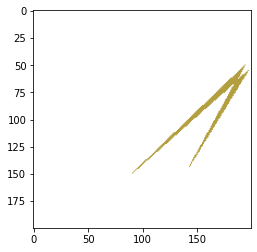

In [104]:
p = Polygon()
print(p)
p.draw()

In [171]:
ind = Individual(n_polygons=2, canvas_size=(400, 400, 3), mutate_p=1, add_or_del_p=0.0)

In [202]:
ind = Individual(n_polygons=5, canvas_size=(400, 400, 3), mutate_p=0.5, add_or_del_p=0.1)
fig = plt.figure(figsize=(10,10))

for i in tqdm(range(50)):
    plt.title(f'Iteration {i}')
    ind.mutate()
    ind.draw()
    plt.imshow(ind.img)
    plt.savefig(f"img/polygon_mutation_{i:03}.png", dpi=150, bbox_inches='tight')
    plt.clf()

  0%|          | 0/50 [00:00<?, ?it/s]

<Figure size 720x720 with 0 Axes>

## Create Gif

In [208]:
import contextlib
from PIL import Image
import os 

fp_out = "polygon_mutation_5fps.gif"

# use exit stack to automatically close opened images
if os.path.exists(fp_out): os.remove(fp_out)
with contextlib.ExitStack() as stack:
    imgs = (stack.enter_context(Image.open(f)) for f in sorted(Path("img").glob("polygon_mutation_*")))
    img = next(imgs)
    img.save(fp=fp_out, format="GIF", append_images=imgs, save_all=True, duration=200, loop=2)

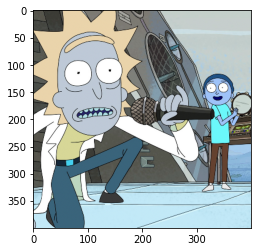

In [241]:
TARGET = cv2.imread("../targets/rick.jpg")
TARGET = cv2.resize(TARGET, (400, 400))
TARGET = TARGET / 255
plt.imshow(TARGET)

In [273]:
n_iter = 5000
pop = Population(popsize=100, target_img=TARGET, add_or_del_p=0.2, n_polygons=20)
pop.optimize(n_iter=n_iter, plot=True)

Output()

  0%|          | 0/5000 [00:00<?, ?it/s]

KeyboardInterrupt: 